In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:05<00:00, 189MB/s]
100% 1.06G/1.06G [00:05<00:00, 204MB/s]


In [4]:
from zipfile import ZipFile
zip_rep = ZipFile('/content/dogs-vs-cats.zip')
zip_rep.extractall('/content')
zip_rep.close()

In [5]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as IDG

train_gen = IDG(shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True,
                rescale = 1./255)

test_gen = IDG(rescale=1./255)

In [6]:
train_data = train_gen.flow_from_directory('/content/train',
                                           target_size = (256,256),
                                           batch_size = 32,
                                           class_mode = 'binary')

test_data = test_gen.flow_from_directory('/content/test',
                                           target_size = (256,256),
                                           batch_size = 32,
                                           class_mode = 'binary')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, BatchNormalization, Dropout, Flatten

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid',activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit_generator(train_data, epochs = 10 , validation_data=test_data)

<ipython-input-10-d145de005df3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, epochs = 10 , validation_data=test_data)


Epoch 1/10
625/625 [==============================] - 322s 515ms/step - loss: 0.7104 - accuracy: 0.5645 - val_loss: 0.6396 - val_accuracy: 0.5974
Epoch 2/10
625/625 [==============================] - 319s 510ms/step - loss: 0.6427 - accuracy: 0.6145 - val_loss: 0.7293 - val_accuracy: 0.6248
Epoch 3/10
625/625 [==============================] - 330s 528ms/step - loss: 0.6245 - accuracy: 0.6513 - val_loss: 0.6028 - val_accuracy: 0.6928
Epoch 4/10
625/625 [==============================] - 414s 662ms/step - loss: 0.5700 - accuracy: 0.7072 - val_loss: 0.5278 - val_accuracy: 0.7408
Epoch 5/10
625/625 [==============================] - 321s 513ms/step - loss: 0.5246 - accuracy: 0.7401 - val_loss: 1.4525 - val_accuracy: 0.5304
Epoch 6/10
625/625 [==============================] - 323s 517ms/step - loss: 0.4845 - accuracy: 0.7648 - val_loss: 0.5165 - val_accuracy: 0.7504
Epoch 7/10
625/625 [==============================] - 326s 521ms/step - loss: 0.4290 - accuracy: 0.7957 - val_loss: 0.4429 -

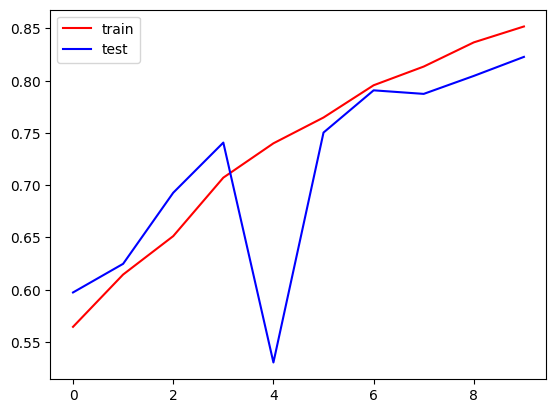

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label='test')
plt.legend()
plt.show()

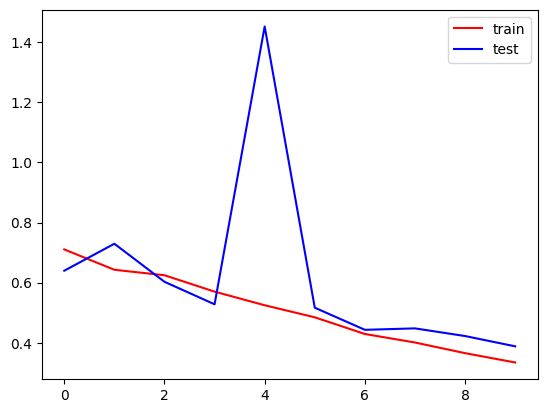

In [12]:
plt.plot(history.history['loss'],color = 'red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

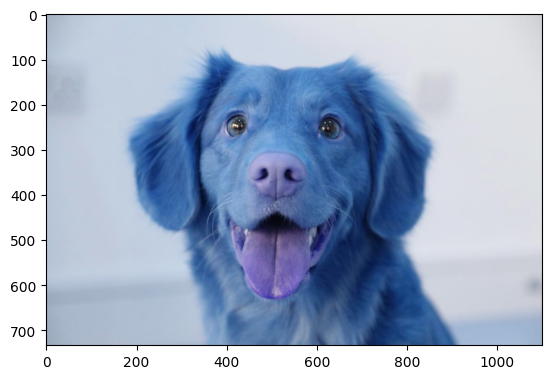

In [26]:
import cv2

new_image = cv2.imread('/content/Dog.jpg')
plt.imshow(new_image)

In [27]:
import numpy as np
new_input = cv2.resize(new_image,(256,256))

input = np.reshape(new_input,[1,256,256,3])

model.predict(input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)